<a href="https://colab.research.google.com/github/cgoeser1/MSDS422_course_assignments/blob/main/AmesHousing(2021SEP24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conduct EDA on the dataset as follows:**
* Provide appropriate descriptive statistics and visualizations to help understand the **marginal distribution** of the dependent variable.
* Investigate **missing data** and **outliers**.
* Investigate at least **three potential predictors** of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.
* Engage in **feature creation** by splitting, merging, or otherwise generating a new predictor.
* Using the dependent variable, perform both **min-max and standard scaling** in Python.
#Checkpoint 2
* Conduct your analysis using a **cross-validation** design.
* Conduct EDA and provide appropriate **visualizations** in the process.
* Build a minimum of **two separate regression models** using the training set.
* Evaluate **polynomial, indicator, dichotomous, & piecewise** model components.
* **Create at least one feature** from the data set.
* Evaluate the models’ **assumptions**.
* Evaluate **goodness of fit** metrics on the training and validation sets.
* Submit predictions for the unseen test set available on **Kaggle.com**.
* Provide your Kaggle user name and a screen snapshot of your **Kaggle scores**.
* Discuss what your models tell you in **layman’s terms**

Import all relevant packages.

In [28]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

Clone the repository, so all files are in the same folder.  Should be accessible to all collaborators.

In [29]:
!git clone https://github.com/cgoeser1/MSDS422_course_assignments


Cloning into 'MSDS422_course_assignments'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 22 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


Change the Colab working directory to that just cloned from GitHub.
Confirm the working directory.

In [30]:
os.chdir('/content/MSDS422_course_assignments')
os.getcwd()

'/content/MSDS422_course_assignments'


Load train and test files into Pandas dataframes.

In [31]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Check the number of observations for each feature in the 'train' set.

[Text(0.5, 1.0, 'SalePrice - High')]

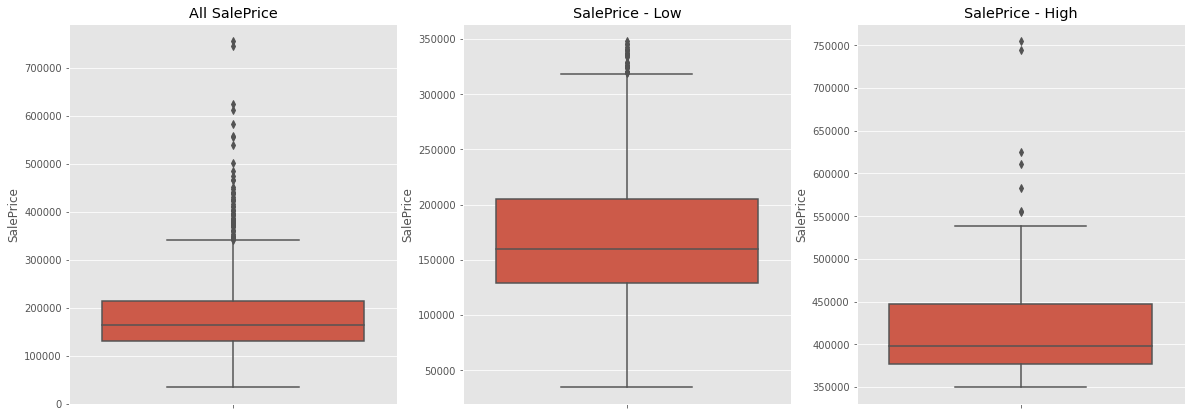

In [32]:
## Check for Outliers. It looks like $350,000 is the max of IQR, 
## so it may make sense to split into two sets ('low' and 'high') based on this price.
train_low = train[train.SalePrice<350000]
train_hi = train[train.SalePrice>=350000]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,7), sharey=False)
sns.boxplot(y=train['SalePrice'], data=train, ax=ax0).set(title='All SalePrice')
sns.boxplot(y=train_low['SalePrice'], data=train_low, ax=ax1).set(title='SalePrice - Low')
sns.boxplot(y=train_hi['SalePrice'], data=train_hi, ax=ax2).set(title='SalePrice - High')

In [33]:
### **Investigate missing data.
## count the number of features.
print(len(train.columns))
train.info()

81
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  Overa

### **Marginal distribution of the SalePrice.**

In [34]:
## Do a quick statistical summary of the train data set SalePrice. -cpg
print(f"Mean Housing Price: ${train.SalePrice.mean():,.2f}.")
print(f"Median Housing Price: ${train.SalePrice.median():,.2f}.")

Mean Housing Price: $180,921.20.
Median Housing Price: $163,000.00.


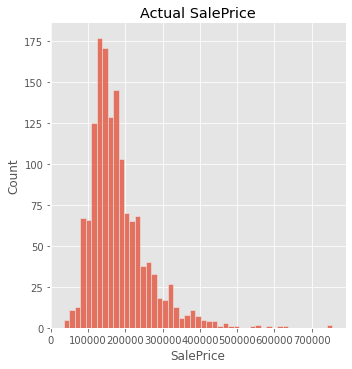

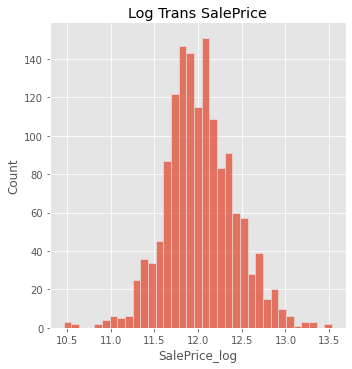

In [35]:
## Count the SalesPrice observations and plot, looking at the SalePrice and log-transformed SalePrice. 
## In SalePrice, we see right skew, due to a tail of more expensive houses. 
## We then try to normalize the distribution with a log transformation.
train['SalePrice_log'] = np.log(train.SalePrice)
sns.displot(train.SalePrice).set(title='Actual SalePrice')
sns.displot(train.SalePrice_log).set(title='Log Trans SalePrice')



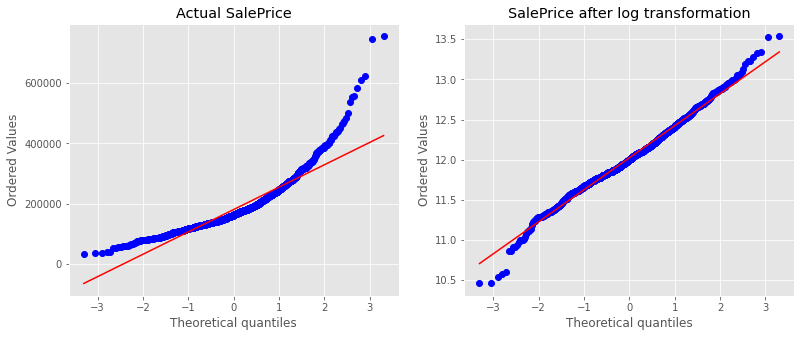

<Figure size 432x288 with 0 Axes>

In [36]:
## Fit the SalePrice and log-transformed SalePrice to a normal curve.  
## 'probplot' plots data against a normal distribution.
figure = plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
stats.probplot(train.SalePrice, plot = plt)
plt.title('Actual SalePrice')
plt.subplot(1,2,2)
stats.probplot(train.SalePrice_log, plot = plt)
plt.title('SalePrice after log transformation')
plt.show()
plt.savefig('SalePrice.jpg')

## **Investigate Outliers**

In [37]:
## Check for Outliers. It looks like $350,000 is the max of IQR, 
## so it may make sense to split into two sets ('low' and 'high') based on this price.
train_low = train[train.SalePrice<350000]
train_hi = train[train.SalePrice>=350000]

[Text(0.5, 1.0, 'SalePrice - High')]

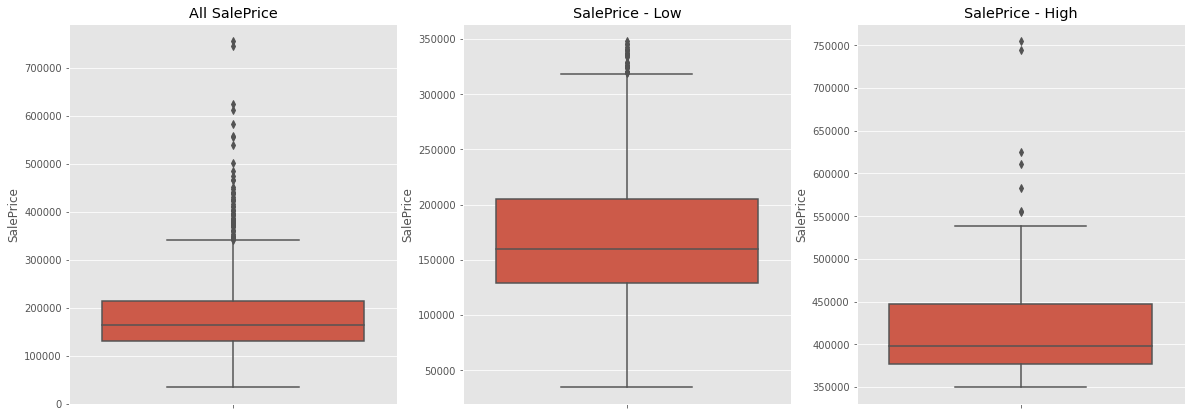

In [38]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,7), sharey=False)
sns.boxplot(y=train['SalePrice'], data=train, ax=ax0).set(title='All SalePrice')
sns.boxplot(y=train_low['SalePrice'], data=train_low, ax=ax1).set(title='SalePrice - Low')
sns.boxplot(y=train_hi['SalePrice'], data=train_hi, ax=ax2).set(title='SalePrice - High')

### **Investigate missing data.**

In [39]:
## Identify the features missing values, so we can determine whether to drop the feature or impute the data.
## Will revisit dropping features later.  Prof. Anil suggests that we can do it better
## by determing the "degree of randomness" of the missing data. 
missing = train.isna().sum()
missing = missing[missing>0]
missing_perc = missing/train.shape[0]*100
missinglist = pd.DataFrame([missing, missing_perc], index = ['missing_num', 'missing_perc']).T
missinglist = missinglist.sort_values(by = 'missing_perc', ascending = False)
print(missinglist)

              missing_num  missing_perc
PoolQC             1453.0     99.520548
MiscFeature        1406.0     96.301370
Alley              1369.0     93.767123
Fence              1179.0     80.753425
FireplaceQu         690.0     47.260274
LotFrontage         259.0     17.739726
GarageType           81.0      5.547945
GarageYrBlt          81.0      5.547945
GarageFinish         81.0      5.547945
GarageQual           81.0      5.547945
GarageCond           81.0      5.547945
BsmtExposure         38.0      2.602740
BsmtFinType2         38.0      2.602740
BsmtFinType1         37.0      2.534247
BsmtCond             37.0      2.534247
BsmtQual             37.0      2.534247
MasVnrArea            8.0      0.547945
MasVnrType            8.0      0.547945
Electrical            1.0      0.068493


### **Consider Imputing and/or dropping features.**

In [40]:
  ## Drop the single record missing Electrical data. 
train.drop(train[train.Electrical.isna()].index, axis = 0, inplace = True)
  ## replace na with 0 for the folowing columns
train['LotFrontage']= train['LotFrontage'].fillna(0)
train['MasVnrArea']= train['MasVnrArea'].fillna(0)
  ## for the rest of the columns it looks like NA is input when the feature is missing so we will replace NA values with 
  ## 'no feature'. This is done to create dummy values
train = train.fillna('No feature')
## Drop GarageYrBlt column 
train = train.drop(columns=['GarageYrBlt'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [41]:
## Drop those features.
## train.drop(droplist, axis = 1, inplace = True)

### **Engage in feature creation by splitting, merging, or otherwise generating a new predictor.**

In [42]:
### **Engage in feature creation by splitting, merging, or otherwise generating a new predictor.**

## Create some features to summarize some that seem fractured.
# find the Age of the house at the sell year. -AA
train['HouseAge'] = train['YrSold']-train['YearBuilt']
## get total number of rooms, above and below grade.
## then remove component features.
train['TotalBathrooms'] = train['BsmtFullBath']+train['BsmtHalfBath']+train['FullBath']+train['HalfBath']
train = train.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], axis=1)
## Total Square Footage; and drop components
train['TotalSF'] = train['TotalBsmtSF']+train['1stFlrSF']+train['2ndFlrSF']
train.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF', 'BsmtFinSF1','BsmtFinSF2','LowQualFinSF'], axis=1, inplace=True)

In [43]:
## Putting Target Feature in the last position of dataframe for easy reference in heatmap. -cpg
last_column = train.pop('SalePrice')
train['SalePrice']=last_column

### **View the correlation between select features and target.**

Text(0.5, 1.0, 'Heatmap Sale Price')

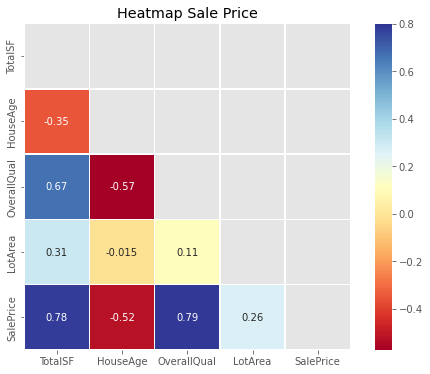

In [44]:
### **View the correlation between select features and target.**

# Create a correlation heatmap to find out which 4 variables -AA (Chad added sq ft)
# "HouseAge", "OverallQual", "LotArea" is more correlated with "SalePrice" 
# Create a df for correlation.
columns = ['TotalSF', 'HouseAge','OverallQual','LotArea','SalePrice']
df_corr = train[columns]
# setting up the heatmap
corrmat = df_corr.corr()

# mask similar squares
mask = np.triu(np.ones_like(corrmat,dtype=bool))

# set the figure size
f, ax = plt.subplots(figsize=(9, 6))

# pass the data and set the parameters
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='RdYlBu', linewidths=.5, mask=mask)
plt.title('Heatmap Sale Price')

In [45]:
## Another way to view the correlation between features and target. -cpg
## Categorical features are not represented... need to convert via dummies.
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice         1.000000
SalePrice_log     0.948384
OverallQual       0.791069
TotalSF           0.782404
GrLivArea         0.708618
GarageCars        0.640473
GarageArea        0.623423
TotalBathrooms    0.613162
TotRmsAbvGrd      0.533779
YearBuilt         0.523273
YearRemodAdd      0.507430
MasVnrArea        0.472606
Fireplaces        0.466968
WoodDeckSF        0.324422
OpenPorchSF       0.315831
LotArea           0.263837
BsmtUnfSF         0.214446
LotFrontage       0.209692
BedroomAbvGr      0.168235
ScreenPorch       0.111419
PoolArea          0.092397
MoSold            0.046380
3SsnPorch         0.044571
MiscVal          -0.021200
Id               -0.021756
YrSold           -0.028907
OverallCond      -0.077924
MSSubClass       -0.084230
EnclosedPorch    -0.128627
KitchenAbvGr     -0.135935
HouseAge         -0.523722
Name: SalePrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f912cb62a10>,
      dtype=object)

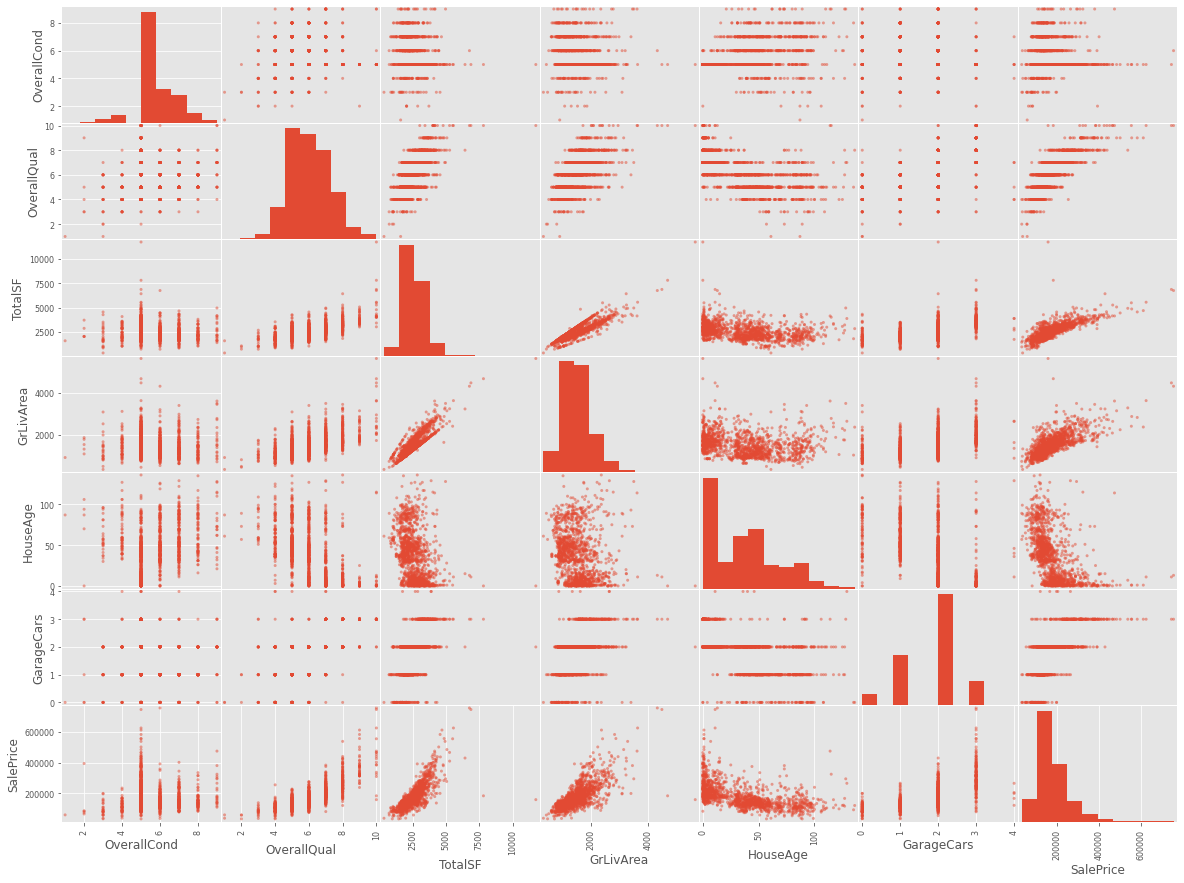

In [46]:
## Look at scatter matrix of some higher correlated features. -cpg
from pandas.plotting import scatter_matrix
top_five_features = ['OverallCond','OverallQual','TotalSF','GrLivArea', 'HouseAge','GarageCars','SalePrice']
scatter_matrix(train[top_five_features], figsize=(20, 15))

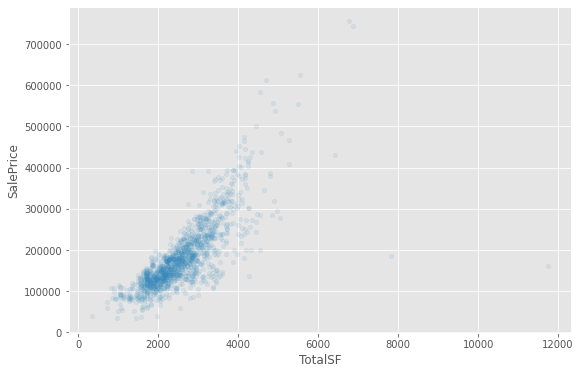

In [47]:
## EDA focus in on one of the higher correlated features. -cpg
f = train.plot(kind="scatter", x="TotalSF", y="SalePrice", alpha=0.1,figsize=(9, 6))


### **View the non-numerical features.**

In [48]:
### **View the non-numerical features.**

## Get list of non-numerical features.
non_numerical = train.select_dtypes(exclude=['int64','float64'])
numerical = train.select_dtypes(exclude=['object'])
##type(non_numerical)
## Show how many unique values within each non-numerical feature.
non_numerical.astype(str)
non_numerical.nunique(dropna=False)
columns_1hot= list(non_numerical.columns)

### **GetDummies, etc., for all non-numerical data.**

In [49]:
# get dummy variables for all cat. variables
dummies = pd.get_dummies(train[columns_1hot])
#drop categorical columns and the Id
train = train.drop(columns= columns_1hot)
# create a new df with dummy variables
train_with_dummies = pd.concat([train,dummies], axis= 'columns')
train_with_dummies.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_log,HouseAge,TotalBathrooms,TotalSF,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No feature,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_No feature,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No feature,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No feature,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No feature,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No feature,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No feature,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No feature,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,G

In [50]:
train_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 298 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(28), uint8(267)
memory usage: 745.2 KB


In [51]:
# drop one of the dummy variable columns so we don't have a dummey variable trap.
train_with_dummies = train_with_dummies.drop('SaleCondition_Normal', axis = 1)
train_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 297 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(28), uint8(266)
memory usage: 743.7 KB


In [52]:
## Putting Target Feature in the last position of dataframe for easy reference.
last_column = train.pop('SalePrice')
train['SalePrice']=last_column
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1459 non-null   int64  
 1   MSSubClass      1459 non-null   int64  
 2   LotFrontage     1459 non-null   float64
 3   LotArea         1459 non-null   int64  
 4   OverallQual     1459 non-null   int64  
 5   OverallCond     1459 non-null   int64  
 6   YearBuilt       1459 non-null   int64  
 7   YearRemodAdd    1459 non-null   int64  
 8   MasVnrArea      1459 non-null   float64
 9   BsmtUnfSF       1459 non-null   int64  
 10  GrLivArea       1459 non-null   int64  
 11  BedroomAbvGr    1459 non-null   int64  
 12  KitchenAbvGr    1459 non-null   int64  
 13  TotRmsAbvGrd    1459 non-null   int64  
 14  Fireplaces      1459 non-null   int64  
 15  GarageCars      1459 non-null   int64  
 16  GarageArea      1459 non-null   int64  
 17  WoodDeckSF      1459 non-null   i

# From the correlation matrix we pick only the variables that have a |correlation coef.| > 0.5 for the model:
- OverallQual, 
- TotalSF, 
- GrLivArea,
- GarageCars, 
- GarageArea, 
- TotalBathrooms, 
- TotRmsAbvGrd, 
- YearBuilt, 
- YearRemodAdd
- HouseAge 
# ...plus the dummy variable columns.

In [53]:
### perform standard scaling 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [54]:
# perform standard scaling transformation   

#x = train_with_dummies.values
#Standard_Scaler = StandardScaler().fit(x)
#train_scaled = DataFrame(Standard_Scaler)
#train_scaled.info()

train_scaled = train_with_dummies
col_names = list(train_with_dummies.columns)
col_names.remove('SalePrice')
## Not sure why we remove the ID column... -cpg
col_names.remove('Id')
features = train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features= scaler.transform(features.values)
train_scaled[col_names] = features
train_scaled.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_log,HouseAge,TotalBathrooms,TotalSF,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No feature,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_No feature,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No feature,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No feature,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No feature,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No feature,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No feature,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No feature,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,G

In [55]:
corr_matrix = train_scaled.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice                  1.000000
SalePrice_log              0.948384
OverallQual                0.791069
TotalSF                    0.782404
GrLivArea                  0.708618
GarageCars                 0.640473
GarageArea                 0.623423
TotalBathrooms             0.613162
BsmtQual_Ex                0.553093
TotRmsAbvGrd               0.533779
YearBuilt                  0.523273
YearRemodAdd               0.507430
KitchenQual_Ex             0.504080
Foundation_PConc           0.498083
MasVnrArea                 0.472606
Fireplaces                 0.466968
ExterQual_Gd               0.452466
ExterQual_Ex               0.451152
BsmtFinType1_GLQ           0.434588
HeatingQC_Ex               0.434583
GarageFinish_Fin           0.420341
Neighborhood_NridgHt       0.402133
SaleType_New               0.357489
SaleCondition_Partial      0.352039
FireplaceQu_Gd             0.339304
GarageType_Attchd          0.335993
MasVnrType_Stone           0.330454
Neighborhood_NoRidge       0

In [56]:
# Create the predictors and response for the model
y = train_scaled['SalePrice']
x = train_scaled[['OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'Foundation_PConc', 'TotalBathrooms', 'MasVnrArea', 'YearBuilt', 'YearRemodAdd', 'BsmtQual_Ex','KitchenQual_Ex']]


In [57]:
# split data for cross-validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=31)

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [59]:
est = smf.ols('SalePrice~ x ', train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     553.5
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:37:51   Log-Likelihood:                -17328.
No. Observations:                1459   AIC:                         3.468e+04
Df Residuals:                    1447   BIC:                         3.474e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.809e+05    915.183    197.699      0.000    1.79e+05    1.83e+05
x[0]         2.01e+04   1586.276     12.674      0.000     1.7e+04    2.32e+04
x[1]        1.887e+04   2162.973      8.722      0.000    1.46e+04    2.31e+04
x[2]        9590.0795   2192.376      4.374      0.000    5289.505    1.39e+04
x[3]        9283.2421   1250.088      7.426      0.000    6831.063    1.17e+04
x[4]         632.8976   1319.848      0.480      0.632   -1956.123    3221.918
x[5]        6893.8999   1355.489      5.086      0.000    4234.967    9552.833
x[6]        3966.6007   1072.535      3.698      0.000    1862.710    6070.491
x[7]        3419.3357   1569.542      2.179      0.030     340.515    6498.156
x[8]        5076.2146   1243.337      4.083      0.000    2637.278    7515.151
x[9]        9829.0658   1161.158      8.465      0.000    7551.334    1.21e+04
x[10]       9051.0823   1115.566      8.113      0.000    6862.783    1.12e+04
==============================================================================
Omnibus:                      734.054   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85328.296
Skew:                          -1.349   Prob(JB):                         0.00
Kurtosis:                      40.368   Cond. No.                         7.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## From the results above we can conclude that some of the predictors have no relation with the response because the t value is low which makes the p value to high. The R^2 of the model is 0.808


In [60]:
# Using sklearn linearregression modle:

## Build the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(181404.51880850218,
 array([21690.43943702, 17997.69809097,  9642.03430025,  9348.36663897,
          -46.44037059,  6318.60434333,  3383.51619031,  3623.78550614,
         4962.10311085, 10427.61909149,  9784.43392648]))

In [61]:
y_test_predic = lin_reg.predict(x_test)

In [62]:
# create a dataframe with the predicted sale price for the x_test and the actual prices from y_test

cross_val_df = pd.DataFrame(y_test_predic, columns = ['PredictedPrice'])
cross_val_df['ActualPrice']= y_test.values
cross_val_df

,PredictedPrice,ActualPrice
0,240849.554761,200500
1,155907.306225,142000
2,118612.540505,147000
3,132797.828213,138887
4,111328.966697,119900
5,132365.866464,148500
6,215521.796978,213000
7,210366.729575,214000
8,122915.369799,89471
9,71935.663452,93500


In [63]:
# find the correlation between the two
cross_val_df.corr()

,PredictedPrice,ActualPrice
PredictedPrice,1.00000,0.89944
ActualPrice,0.89944,1.00000


In [65]:
# Calculate R^2
correl = 0.89944
R_sq = correl*correl
R_sq

0.8089923136

## We can see that the R^2 of both models is 0.808

### **Let us prepare the test dataset**

In [66]:

test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [67]:
### **Consider Imputing and/or dropping features.**
  ## replace na with 0 for the folowing columns 
test['BsmtUnfSF']= test['BsmtUnfSF'].dropna()
test['TotalBsmtSF']= test['TotalBsmtSF'].fillna(0)
test['GarageArea']= test['GarageArea'].fillna(0)
test['GarageCars']= test['GarageCars'].fillna(0)
test['BsmtFinSF1']= test['BsmtFinSF1'].fillna(0)
test['BsmtFinSF2']= test['BsmtFinSF2'].fillna(0)
test['LotFrontage']= test['LotFrontage'].fillna(0)
test['BsmtFullBath']= test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath']= test['BsmtHalfBath'].fillna(0)
test['MasVnrArea']= test['MasVnrArea'].fillna(0)
  ## for the rest of the columns it looks like NA is input when the feature is missing so we will replace NA values with 
  ## 'no feature'. This is done to create dummy values.
test = test.fillna('No feature')
## Drop GarageYrBlt column 
test = test.drop(columns=['GarageYrBlt'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [68]:
# find the Age of the house at the sell year. -AA
test['HouseAge'] = test['YrSold']-test['YearBuilt']
## get total number of rooms, above and below grade.
## then remove component features.
test['TotalBathrooms'] = test['BsmtFullBath']+test['BsmtHalfBath']+test['FullBath']+test['HalfBath']
test = test.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], axis=1)
## Total Square Footage; and drop components
test['TotalSF'] = test['TotalBsmtSF']+test['1stFlrSF']+test['2ndFlrSF']
test.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF', 'BsmtFinSF1','BsmtFinSF2','LowQualFinSF'], axis=1, inplace=True)

In [69]:
### **View the non-numerical features.**

## Get list of non-numerical features.
non_numerical = test.select_dtypes(exclude=['int64','float64'])
numerical = test.select_dtypes(exclude=['object'])
##type(non_numerical)
## Show how many unique values within each non-numerical feature.
non_numerical.astype(str)
non_numerical.nunique(dropna=False)
columns_1hot= list(non_numerical.columns)

In [70]:
# get dummy variables for all cat. variables
dummies = pd.get_dummies(test[columns_1hot])
#drop categorical columns and the Id
test = test.drop(columns= columns_1hot)
# create a new df with dummy variables
test_with_dummies = pd.concat([test,dummies], axis= 'columns')
test_with_dummies.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HouseAge,TotalBathrooms,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_No feature,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No feature,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_No feature,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_No feature,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_No feature,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_No feature,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No feature,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No feature,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No feature,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No feature,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No feature,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtUnfSF_0.0,BsmtUnfSF_17.0,BsmtUnfSF_20.0,BsmtUnfSF_22.0,BsmtUnfSF_25.0,BsmtUnfSF_27.0,BsmtUnfSF_28.0,BsmtUnfSF_30.0,BsmtUnfSF_33.0,BsmtUnfSF_34.0,BsmtUnfSF_35.0,BsmtUnfSF_36.0,BsmtUnfSF_42.0,BsmtUnfSF_45.0,BsmtUnfSF_46.0,BsmtUnfSF_48.0,BsmtUnfSF_52.0,BsmtUnfSF_53.0,BsmtUnfSF_54.0,BsmtUnfSF_55.0,BsmtUnfSF_56.0,BsmtUnfSF_57.0,BsmtUnfSF_58.0,BsmtUnfSF_60.0,BsmtUnfSF_63.0,BsmtUnfSF_72.0,BsmtUnfSF_75.0,BsmtUnfSF_76.0,BsmtUnfSF_78.0,BsmtUnfSF_79.0,BsmtUnfSF_80.0,BsmtUnfSF_83.0,BsmtUnfSF_86.0,BsmtUnfSF_88.0,BsmtUnfSF_89.0,BsmtUnfSF_90.0,BsmtUnfSF_91.0,BsmtUnfSF_93.0,BsmtUnfSF_94.0,BsmtUnfSF_95.0,BsmtUnfSF_96.0,BsmtUnfSF_98.0,BsmtUnfSF_99.0,BsmtUnfSF_100.0,BsmtUnfSF_102.0,BsmtUnfSF_104.0,BsmtUnfSF_106.0,BsmtUnfSF_107.0,BsmtUnfSF_108.0,BsmtUnfSF_109.0,BsmtUnfSF_110.0,BsmtUnfSF

In [71]:
# Perform standared scaling transformation
test_scaled = test_with_dummies
col_names = list(test_with_dummies.columns)
col_names.remove('Id')
features = test_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features= scaler.transform(features.values)
test_scaled[col_names] = features
test_scaled.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HouseAge,TotalBathrooms,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_No feature,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No feature,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_No feature,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_No feature,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_No feature,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_No feature,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No feature,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No feature,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No feature,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No feature,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No feature,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtUnfSF_0.0,BsmtUnfSF_17.0,BsmtUnfSF_20.0,BsmtUnfSF_22.0,BsmtUnfSF_25.0,BsmtUnfSF_27.0,BsmtUnfSF_28.0,BsmtUnfSF_30.0,BsmtUnfSF_33.0,BsmtUnfSF_34.0,BsmtUnfSF_35.0,BsmtUnfSF_36.0,BsmtUnfSF_42.0,BsmtUnfSF_45.0,BsmtUnfSF_46.0,BsmtUnfSF_48.0,BsmtUnfSF_52.0,BsmtUnfSF_53.0,BsmtUnfSF_54.0,BsmtUnfSF_55.0,BsmtUnfSF_56.0,BsmtUnfSF_57.0,BsmtUnfSF_58.0,BsmtUnfSF_60.0,BsmtUnfSF_63.0,BsmtUnfSF_72.0,BsmtUnfSF_75.0,BsmtUnfSF_76.0,BsmtUnfSF_78.0,BsmtUnfSF_79.0,BsmtUnfSF_80.0,BsmtUnfSF_83.0,BsmtUnfSF_86.0,BsmtUnfSF_88.0,BsmtUnfSF_89.0,BsmtUnfSF_90.0,BsmtUnfSF_91.0,BsmtUnfSF_93.0,BsmtUnfSF_94.0,BsmtUnfSF_95.0,BsmtUnfSF_96.0,BsmtUnfSF_98.0,BsmtUnfSF_99.0,BsmtUnfSF_100.0,BsmtUnfSF_102.0,BsmtUnfSF_104.0,BsmtUnfSF_106.0,BsmtUnfSF_107.0,BsmtUnfSF_108.0,BsmtUnfSF_109.0,BsmtUnfSF_110.0,BsmtUnfSF

### **Get predictions for the test set**

In [72]:
## Get all the predictors 
x_pred = test_scaled[['OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', \
                      'Foundation_PConc', 'TotalBathrooms', 'MasVnrArea', \
                      'YearBuilt', 'YearRemodAdd', 'BsmtQual_Ex','KitchenQual_Ex']]

In [73]:
# Use Sklearn model to get predictions
price_predic = lin_reg.predict(x_pred)
price_predic.shape

(1459,)

In [74]:
# Create a dataframe for results to be submitted 
results = pd.DataFrame(test_scaled[['Id']], columns= ['Id'])
results['PredictedPrice'] = price_predic
results.shape

(1459, 2)

In [75]:
os.getcwd()

'/content/MSDS422_course_assignments'

In [79]:
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"test_predict_{date}.csv")
results.to_csv(filename, index=False)

test_predict_2021_10_02-06.44PM.csv
